# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** This is a classification problem. The goal of this project is to identity students who might need early intervention that may help them graduate from school. So, the output of the supervised learning algorithm are two categories: (1) students that need intervention, and (2) students that do not need intervention. The supervised regression learning produces continuous output, which is not the case for this problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = np.float(sum(student_data['passed'] == 'yes'))
# TODO: Calculate failing students
n_failed = np.float(sum(student_data['passed'] == 'no'))

# TODO: Calculate graduation rate
grad_rate = np.float(n_passed/n_students)

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate*100)

Total number of students: 395
Number of features: 30
Number of students who passed: 265.0
Number of students who failed: 130.0
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
# Return all columns headers, except for the last one
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
# Return the last column header
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()


Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        # Collect the revised columns
        output = output.join(col_data)
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify=y_all, test_size=num_test, random_state=666)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

# Check if the class distributions in training set and test set are same.
print "Grad rate of train set: {:.2f}%".format(100 * (y_train == 'yes').mean())
print "Grad rate of test set: {:.2f}%".format(100 * (y_test == 'yes').mean())

Training set has 300 samples.
Testing set has 95 samples.
Grad rate of train set: 67.00%
Grad rate of test set: 67.37%


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

Gaussian Naive Bayes(GaussianNB), Decision Trees, and Support Vector Machines(SVM) are appropriate models for this problem.

*--**Naive Bayes**--*

**Naive Bayes** methods are a group of supervised learning models that are applying Bayes's theorem. The underlying assumptions of all Naive Bayes methods is that all the features (attributes) that determine the outcome (a label) are conditionally independent given the label. Naive Bayes methods are widely used on building spam filters [1,2]. Using Maximum A Posteriori (MAP) estimation, the prediction of a label given the features of training examples can be reduced to the esimation of the probabilities of labels, and the probabilites of features given labels. According to the assumption of the probabilites of features given labels, there are variations of Naive Bayes classifiers: Gaussian Naive Bayes, multinomial Naive Bayes, Bernoulli Naive Bayes and so on.

The **strengths** of the **Naive Bayes** are: (1) Inference is cheap, so Naive Bayes classifier can be very fast. (2) Parameters are few. Only the prior probability distribution of labels, and probability of features given labeles matter. (3) Naive Bayes decouple the class conditional distribution. The decoupling makes each joint distribution to be estimated independently as a sets of one-dimension distribution for each feature, which is helpful for supervised learning in terms of reducing its sensitivity to the curse of dimensionality [3]. 

The **weaknesses** of the **Naive Bayes** are: (1) The interrelationship between features cannot be modeled. (2) The calculated probability is not convincing, due to the simple assumptions.

Given the data, the task here is to classify whether a student is able to graduate or not. It is a simple binary output. The application of Naive Bayes on spam filtering is similar to this case. Therefore, Naive Bayes makes a good candidate for this problem.

*--**Decision Trees**--*

Decision tree classifiers are can be used on medical diagnosis [4]. The researchers used a decision tree-based method to build a decision support system to help inexperienced doctores to make more accurate diagnosis.

The **strengths** of the **Decision Trees** are: (1) Its logic is simple and easy to interpret, which makes this model a white box model. (2) the computation cost is cheap. It is the logarithmic in the number of data points used to train the tree. (3) The validation on decision tree models by using statistial tests is possible. (4) It is possible to build bigger classifier out of decision trees. (5) It is non-parametric, so there is no need to assume pre-defined distribution. (6) It can deal with unbalanced classes (7) Decision Trees are robust to outliers [5].

The **weakness** of the **Decision Trees** are: (1) Decision-tree classifiers are susceptible to overfitting, especially with a large amount of features. (2) That small variations in data might lead to a totally different tree make decision tree classifiers unstable. (3) Decision tree classifiers tend to create biased trees if some class lables are prevalent compares to others.

Given the data, after preprocessing, there are 48 features, inculding dummy variables, in each example. It is important to understand which featuers are the most significant contributors to the graduate results. As a white box model, decission trees can shed lights on the most responsible attributes. For example, the root node attribute can be considered to be the most important indicator among all the features. Therefore, decision trees could be good model candidates.

*--**SVM**--*

SVM classifiers can be used on many science and engineering fields [6], such as classifying the spatial polution data [7], and classifying patient groups [8]. 

The **strengths** of the **SVM** are: (1) It is effective in high dimensional spaces. (2) Only a few training examples are used to define the hyperplane, so it does not take too much memory. (3) Kernal functions make SVM more powerful to draw soft margin. (4) SVM with RBF kernel is proven to be extremely powerful at binary classification like this case [9].

The **weakness** of the **SVM** are: (1) SVM tends to overfit the noise in the large tranining data set. (2) With the increase of the training data, the training time increases dramatically.
(3) SVMs do not calculated probalities of predicted labels.

That SVM is effective in high dimensional spaces makes it a good candidate for this problem. In this case, we only have 300 training examples. Each is characterized with 48 features after preprocessing. So, SVM is expected to deal with the complicated feature space.

**References:**

*[1] Vangelis Metsis, Ion Androutsopoulos, and Georgios Paliouras (2006) Spam Filtering with Naive Bayes - Which Naive Bayes?, Conference: Conference on Email and Anti-Spam - CEAS*

*[2] Tiago A. Almeida and Akebo Yamakami (2010) Content-Based Spam Filtering, in Proceedings of the 23rd IEEE International Joint Conference on Neural Networks*

*[3] Naive Bayes documention in sklearn, http://scikit-learn.org/stable/modules/naive_bayes.html*

*[4] Pavlopoulos SA, Stasis AC, Loukis EN.A decision tree--based method for the differential diagnosis of Aortic Stenosis from Mitral Regurgitation using heart sounds (2004). Biomed Eng Online. Volume 3(Issue 1):21.*

*[5] Yan-yan SONG, Ying LU Decision tree methods: applications for classification and prediction (2015), Shanghai Arch Psychiatry. Volume 27(Issue 2): 130–135.*

*[6] Sujay Raghavendra. N, Paresh Chandra Deka (2014) Support vector machine applications in the field of hydrology: A review, in Applied Soft Computing,  volume 19.*

*[7] N. Gilardi, M. Kanevski, M. Maignan, E. Mayoraz (1999) Environmental and Pollution Spatial Data Classification with Support Vector Machines and Geostatistics*

*[8] Jayasree, T., Bobby, M. & Muttan, S. (2015) Sensor Data Classification for Renal Dysfunction Patients Using Support Vector Machine, Journal of Medical and Biological Engineering, Volume 35, Issue 6, pp 759–764*

*[9] Jacques Wainer (2016) Comparison of 14 different families of classification algorithms on 115 binary datasets*

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [7]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
# from sklearn import model_B
# from skearln import model_C
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=666)
clf_C = SVC(random_state=666)

# TODO: Set up the training set sizes
# TODO: Execute the 'train_predict' function for each classifier and each training set size

for clf in [clf_A, clf_B, clf_C]:
    print "\n{}: \n".format(clf.__class__.__name__)
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)



GaussianNB: 

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0034 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 0.2564.
Made predictions in 0.0008 seconds.
F1 score for test set: 0.2564.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0025 seconds
Made predictions in 0.0011 seconds.
F1 score for training set: 0.8266.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.7714.
Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0011 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 0.8107.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.7862.

DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0041 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7227.
Training a DecisionTreeCla

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - GaussianNB**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |          0.0016         |        0.0003          |     0.2564       |    0.2564       |
| 200               |          0.0008         |        0.0003          |     0.8266       |    0.7714       |
| 300               |          0.0008         |        0.0003          |     0.8107       |    0.7862       |

** Classifer 2 - Decision Tree**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0008             |        0.0002          |      1.0000      |      0.7227     |
| 200               |      0.0014             |        0.0002          |      1.0000      |      0.6555     |
| 300               |      0.0017             |        0.0001          |      1.0000      |      0.7500     |

** Classifer 3 - SVM**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0012           |       0.0006           |        0.9067    |      0.8025     |
| 200               |        0.0028           |       0.0010           |        0.8963    |      0.7947     |
| 300               |        0.0058           |       0.0013           |        0.8677    |      0.8026     |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

I argue that the support vector machine(SVM) is the best model for this problem, given the limited training data.

Clearly, the SVM provides the best porfmance in the test data. F1 Score(test) from SVM is highest among the three models I performed. Although the training time increases significantly with the increase of training set size, it is reasonable to use SVM in this case, since there are only 300 examples available. If there are too many training examples, the SVM tends to be much slower training-time-wise. In addition, SVM tends to overfit the noise in the large tranining data set.

Compared to SVM, DecesionTreeClassifier is inferior, since it is prone to overfitting. There are many (48) features for training examples. The decision tree, in this case, is easy to create an over-complex tree that do not generalize the data well. That the F1 score is 1.00 for training data and much lower in test set indicates that overfitting occures in the training. In addition, decesion tree learners tend to create biased trees if some classes dominate. In this case, the class 'yes' accounts for 67% of the label data. Therefore, a decision tree may be biased to label 'yes'.

Compared to SVM, GaussianNB assumes that the features of the examples follow normal distribution, and the features are conditionally independent with each other given the label. The relationship between the features cannot be modeled. With the increase of training data size, the performance (F1 score) of GaussianNB increases. In this case, the training data size is not large enough that it can outperform SVM.

### Look at the Confusion Matrix (add-on)

/Users/JundongQiao/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


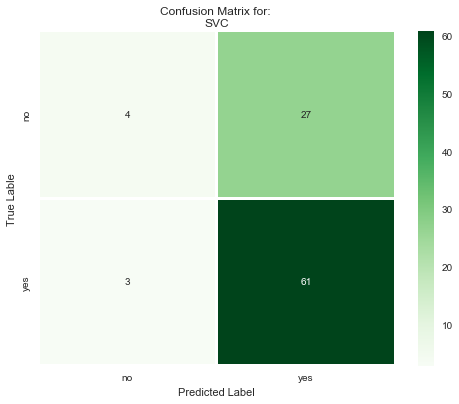

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Compute the confusion matrix for a model
model = clf_C
cm = confusion_matrix(y_test.values, model.predict(X_test))

# Visulization in a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt="d", linewidths=2,  
            xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True Lable')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for: \n{}'.format(model.__class__.__name__))

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

There are several reasons to choose SVM as the the final model for this problem:

(1) Each student is characterized with 48 attributes, such as school, sex, age parent status and so on. SVM takes those attributes associated with students to create a function, which draws a boundary to separate the students who passed from the ones who failed. See, the figure below:
![SVM](https://github.com/jundongq/machine-learning/blob/master/projects/student_intervention/SVM_1.png?raw=true)

(2) The training process of the SVM model is to find the optimal boundary that can seperatethe students who passed from the ones who failed according to the associated attributes (school, sex, age parent status and so on). If the students cannot be separated by a linear line, a kernel trick (a function *Φ* in the picture below) can be used to transform the input space (raw attributes) in to a higher dimensional space (feature spaces), shown as below:
![SVM](https://udacity-github-sync-content.s3.amazonaws.com/_imgs/19273/1464624531/1gvce.png)
In this figure, the features spaces can be considered as more complicated features which are created from the raw attributres, for separating the students easily.

(3) After training, which means the optimal boundary that seperate the classes is found, we can easily to predict the class of new data point by simply putting it in the feature space. It will be together with the data points labeled as the same class; see the figure below:
![SVM](https://github.com/jundongq/machine-learning/blob/master/projects/student_intervention/SVM_2.png?raw=true)

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

Made predictions in 0.0042 seconds.
Tuned model has a training F1 score of 0.8380.
Made predictions in 0.0014 seconds.
Tuned model has a testing F1 score of 0.8105.
{'kernel': 'rbf', 'C': 13.5936, 'gamma': 0.54120000000000001}


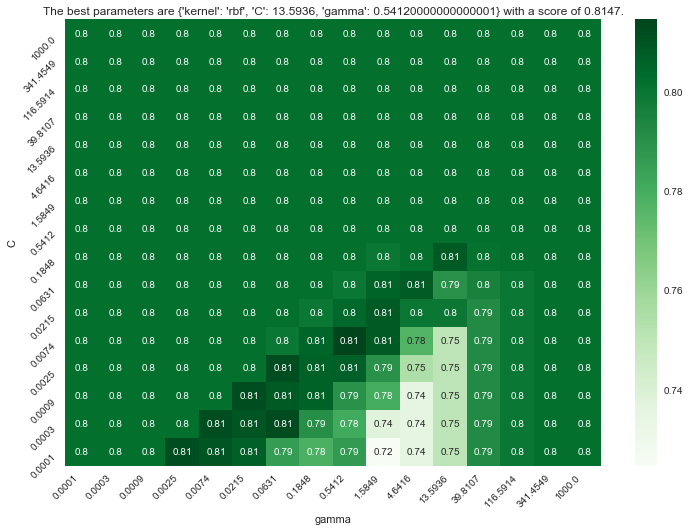

In [14]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# Normalize the features
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test  = normalizer.fit_transform(X_test)

# TODO: Create the parameters list you wish to tune
kernels = ['rbf']
C_range = np.around(np.logspace(-4,3,16),decimals=4)
gamma_range = np.around(np.logspace(-4,3,16),decimals=4)
parameters  = dict(kernel=kernels, C=C_range,gamma=gamma_range)

# TODO: Initialize the classifier
clf = SVC(random_state=168)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring = f1_scorer, cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Store the scores
scores = [x[1] for x in grid_obj.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))
print grid_obj.best_params_

# Visualize the heatmap of the parameters, C, gamma
plt.figure(figsize=(12,8))
sns.heatmap(scores, annot=True, cmap='Greens')
plt.ylabel('C')
plt.xlabel('gamma')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range, rotation=45)
plt.title("The best parameters are {} with a score of {:0.4f}.".
          format(grid_obj.best_params_, grid_obj.best_score_))

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **
The final model's F1 score on test data is 0.8380, which is lower than 0.8677 in the default model chosen. This means the tuned model is less likely to memorize the data than the defalt model might do. 

The final model's F1 score on test data is 0.8105, which is slightly higher than 0.8026 in the default model chosen. The subtle improvement indicates that based on the given data, it is the best the SVM can do to generalize the features.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.